In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
colors = sns.color_palette('pastel')
colors

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [3]:
df=pd.read_excel("bank.xlsx")

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## No null values are found in dataset
## 17 nos. of columns including target column

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
df.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


## How many percent of people subscribed to term deposit ?

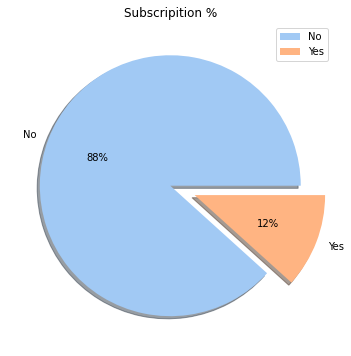

In [9]:
plt.figure(figsize=(6,6))
labels = ['No','Yes']
plt.pie(df["y"].value_counts(), labels = labels, colors = colors, autopct='%.0f%%',shadow=True,explode=[0.0,0.2])
plt.legend()
plt.title('Subscripition %')
plt.show()

## Only 12% of people have subscribed to term deposit plan 

## How many People seemed Intrested w.r.t their job ?

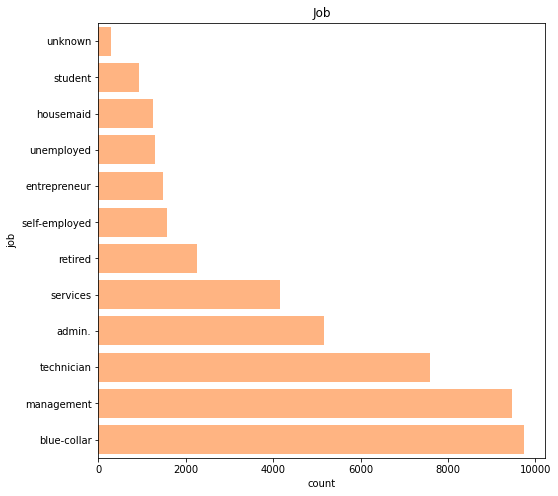

In [10]:
plt.figure(figsize=(8,8))
sns.countplot(y=df["job"],color=colors[1],order= df['job'].value_counts().index[::-1],saturation=1)
plt.title('Job')
plt.show()

## How many people actually signed up for plan w.r.t their job ?

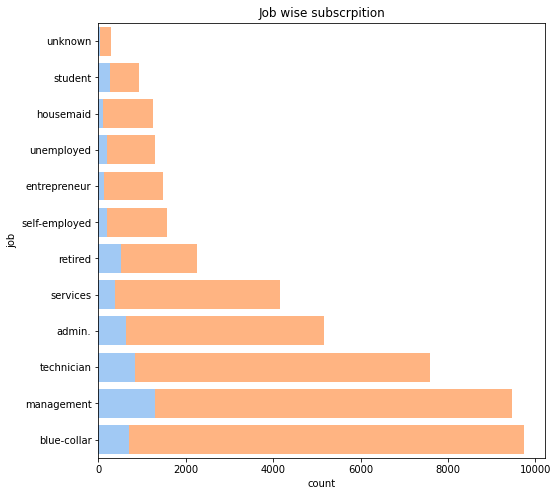

In [11]:
plt.figure(figsize=(8,8))
sns.countplot(y=df["job"],color=colors[1],order= df['job'].value_counts().index[::-1],saturation=1)
sns.countplot(y=df["job"][df["y"]=='yes'],color=colors[0],order= df['job'].value_counts().index[::-1],saturation=1)
plt.title('Job wise subscrpition')
plt.show()

## Seems like working professionals are more interested in the plan compared to unemployed or self-employed personals

## Does marital status affect signing of term deposit plans ?

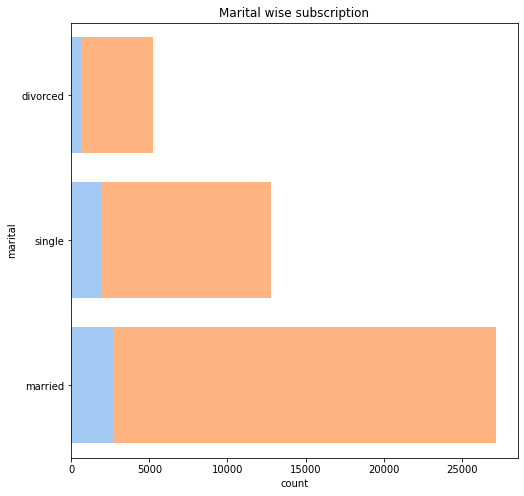

In [12]:
plt.figure(figsize=(8,8))
plt.title('Marital wise subscription')
sns.countplot(y=df["marital"],color=colors[1],order= df['marital'].value_counts().index[::-1],saturation=1)
sns.countplot(y=df["marital"][df["y"]=='yes'],color=colors[0],order= df['marital'].value_counts().index[::-1],saturation=1)
plt.show()

## More married people were approached by agents for enquiry

In [13]:
((df["marital"][df["y"]=="yes"].value_counts())/df["marital"].value_counts())*100

married     10.123466
single      14.949179
divorced    11.945458
Name: marital, dtype: float64

## Looking at the percents chances of single personals opting for the plan is more likely compared to any other category

## Which age group has been targeted by agents ?

In [14]:
df["age"].value_counts()[:5]

32    2085
31    1996
33    1972
34    1930
35    1894
Name: age, dtype: int64

In [15]:
temp=pd.DataFrame()

In [16]:
def st(x):
    if x<20:
        return 1
    elif x<40:
        return 2
    elif x<60:
        return 3
    else:
        return 4

In [17]:
temp["age_g"]=df["age"].apply(st)

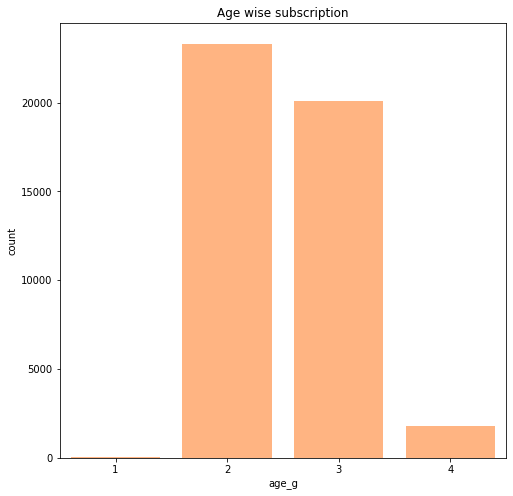

In [18]:
plt.figure(figsize=(8,8))
plt.title('Age wise subscription')
sns.countplot(x=temp["age_g"],color=colors[1],saturation=1)
plt.show()

## People with age group of 20-40 and 40 - 60 are mostly targeted by agents

## In which month most plans have been purchased ? 

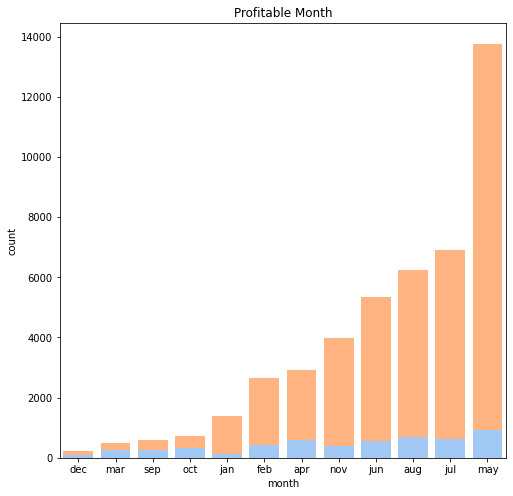

In [19]:
plt.figure(figsize=(8,8))
plt.title('Profitable Month')
sns.countplot(x=df["month"],color=colors[1],order= df['month'].value_counts().index[::-1],saturation=1)
sns.countplot(x=df["month"][df["y"]=="yes"],color=colors[0],order= df['month'].value_counts().index[::-1],saturation=1)
plt.show()

In [20]:
((df["month"][df["y"]=="yes"].value_counts())/df["month"].value_counts())*100

apr    19.679400
aug    11.013286
dec    46.728972
feb    16.647792
jan    10.121169
jul     9.093546
jun    10.222805
mar    51.991614
may     6.719454
nov    10.151134
oct    43.766938
sep    46.459413
Name: month, dtype: float64

## Agents should focus more in March, September, October, December as success rate is more 

## What was the outcome of previous marketing campaing ?

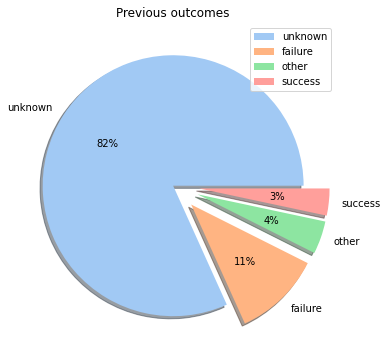

In [21]:
plt.figure(figsize=(6,6))
plt.pie(df["poutcome"].value_counts(),labels=df["poutcome"].value_counts().index ,colors = colors, autopct='%.0f%%',shadow=True,explode=[0.0,0.2,0.2,0.2])
plt.legend()
plt.title('Previous outcomes')
plt.show()

## Success rate of previous campaign was 3% 

## Data preparation for machine learning

In [22]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [23]:
from sklearn.preprocessing import OrdinalEncoder

In [24]:
ob=df.select_dtypes('object')
nm=df.select_dtypes(["int","float"])

In [25]:
ob

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [26]:
nm

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


## Encoding objects datatypes into numerical values

In [27]:
oe=OrdinalEncoder()

In [28]:
ob[["job","marital","education","default","housing","loan","contact","month","poutcome","y"]]=oe.fit_transform(ob[["job","marital","education","default","housing","loan","contact","month","poutcome","y"]])

In [29]:
df2=pd.concat([nm,ob],axis=1)

In [30]:
df2

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,58,2143,5,261,1,-1,0,4.0,1.0,2.0,0.0,1.0,0.0,2.0,8.0,3.0,0.0
1,44,29,5,151,1,-1,0,9.0,2.0,1.0,0.0,1.0,0.0,2.0,8.0,3.0,0.0
2,33,2,5,76,1,-1,0,2.0,1.0,1.0,0.0,1.0,1.0,2.0,8.0,3.0,0.0
3,47,1506,5,92,1,-1,0,1.0,1.0,3.0,0.0,1.0,0.0,2.0,8.0,3.0,0.0
4,33,1,5,198,1,-1,0,11.0,2.0,3.0,0.0,0.0,0.0,2.0,8.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,9.0,1.0,2.0,0.0,0.0,0.0,0.0,9.0,3.0,1.0
45207,71,1729,17,456,2,-1,0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,3.0,1.0
45208,72,5715,17,1127,5,184,3,5.0,1.0,1.0,0.0,0.0,0.0,0.0,9.0,2.0,1.0
45209,57,668,17,508,4,-1,0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,9.0,3.0,0.0


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

## Dataset is imbalance hence Balancing the data 

In [32]:
df2['y'].value_counts()

0.0    39922
1.0     5289
Name: y, dtype: int64

## Balancing the data 
## 1. Resampling technique
## 2. SMOTE

In [33]:
df_majority = df2[df2['y']==0] 
df_minority = df2[df2['y']==1]

In [34]:
df_majority

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,58,2143,5,261,1,-1,0,4.0,1.0,2.0,0.0,1.0,0.0,2.0,8.0,3.0,0.0
1,44,29,5,151,1,-1,0,9.0,2.0,1.0,0.0,1.0,0.0,2.0,8.0,3.0,0.0
2,33,2,5,76,1,-1,0,2.0,1.0,1.0,0.0,1.0,1.0,2.0,8.0,3.0,0.0
3,47,1506,5,92,1,-1,0,1.0,1.0,3.0,0.0,1.0,0.0,2.0,8.0,3.0,0.0
4,33,1,5,198,1,-1,0,11.0,2.0,3.0,0.0,0.0,0.0,2.0,8.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45194,59,138,16,162,2,187,5,4.0,1.0,2.0,0.0,1.0,1.0,0.0,9.0,0.0,0.0
45198,37,1428,16,333,2,-1,0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,9.0,3.0,0.0
45199,34,1475,16,1166,3,530,12,1.0,2.0,1.0,0.0,1.0,0.0,0.0,9.0,1.0,0.0
45209,57,668,17,508,4,-1,0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,9.0,3.0,0.0


In [35]:
df_minority

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
83,59,2343,5,1042,1,-1,0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,8.0,3.0,1.0
86,56,45,5,1467,1,-1,0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,8.0,3.0,1.0
87,41,1270,5,1389,1,-1,0,9.0,1.0,1.0,0.0,1.0,0.0,2.0,8.0,3.0,1.0
129,55,2476,5,579,1,-1,0,7.0,1.0,1.0,0.0,1.0,0.0,2.0,8.0,3.0,1.0
168,54,184,5,673,2,-1,0,0.0,1.0,2.0,0.0,0.0,0.0,2.0,8.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,2850,17,300,1,40,8,5.0,1.0,1.0,0.0,0.0,0.0,0.0,9.0,0.0,1.0
45205,25,505,17,386,2,-1,0,9.0,2.0,1.0,0.0,0.0,1.0,0.0,9.0,3.0,1.0
45206,51,825,17,977,3,-1,0,9.0,1.0,2.0,0.0,0.0,0.0,0.0,9.0,3.0,1.0
45207,71,1729,17,456,2,-1,0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,3.0,1.0


## Resampling technique wasn't improving the data hence choose SMOTE

In [36]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=1)
oversampled_X, oversampled_Y = sm.fit_resample(df2.drop('y', axis=1), df2['y'])
df_upsampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [37]:
df_upsampled

,y,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome
0,0.0,58,2143,5,261,1,-1,0,4.000000,1.000000,2.000000,0.0,1.000000,0.000000,2.0,8.000000,3.000000
1,0.0,44,29,5,151,1,-1,0,9.000000,2.000000,1.000000,0.0,1.000000,0.000000,2.0,8.000000,3.000000
2,0.0,33,2,5,76,1,-1,0,2.000000,1.000000,1.000000,0.0,1.000000,1.000000,2.0,8.000000,3.000000
3,0.0,47,1506,5,92,1,-1,0,1.000000,1.000000,3.000000,0.0,1.000000,0.000000,2.0,8.000000,3.000000
4,0.0,33,1,5,198,1,-1,0,11.000000,2.000000,3.000000,0.0,0.000000,0.000000,2.0,8.000000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79839,1.0,35,1971,10,386,1,181,1,7.489294,1.418451,1.418451,0.0,0.000000,0.000000,0.0,8.489294,1.163098
79840,1.0,42,-485,16,996,1,-1,0,5.409569,1.000000,1.551196,0.0,0.000000,0.551196,0.0,8.551196,3.000000
79841,1.0,55,1946,2,224,1,122,4,4.939535,1.000000,0.015116,0.0,0.000000,0.000000,0.0,7.045349,0.030233
79842,1.0,46,441,20,154,1,181,1,1.259132,0.314783,0.629566,0.0,0.685217,0.000000,0.0,3.147829,2.000000


In [38]:
df_upsampled['y'].value_counts()

0.0    39922
1.0    39922
Name: y, dtype: int64

## Dataset is now balanced

## Seperating dependent and independent column

In [39]:
y=df_upsampled.iloc[:,0]
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
79839    1.0
79840    1.0
79841    1.0
79842    1.0
79843    1.0
Name: y, Length: 79844, dtype: float64

In [40]:
x=df_upsampled.iloc[:,1:]
x

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome
0,58,2143,5,261,1,-1,0,4.000000,1.000000,2.000000,0.0,1.000000,0.000000,2.0,8.000000,3.000000
1,44,29,5,151,1,-1,0,9.000000,2.000000,1.000000,0.0,1.000000,0.000000,2.0,8.000000,3.000000
2,33,2,5,76,1,-1,0,2.000000,1.000000,1.000000,0.0,1.000000,1.000000,2.0,8.000000,3.000000
3,47,1506,5,92,1,-1,0,1.000000,1.000000,3.000000,0.0,1.000000,0.000000,2.0,8.000000,3.000000
4,33,1,5,198,1,-1,0,11.000000,2.000000,3.000000,0.0,0.000000,0.000000,2.0,8.000000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79839,35,1971,10,386,1,181,1,7.489294,1.418451,1.418451,0.0,0.000000,0.000000,0.0,8.489294,1.163098
79840,42,-485,16,996,1,-1,0,5.409569,1.000000,1.551196,0.0,0.000000,0.551196,0.0,8.551196,3.000000
79841,55,1946,2,224,1,122,4,4.939535,1.000000,0.015116,0.0,0.000000,0.000000,0.0,7.045349,0.030233
79842,46,441,20,154,1,181,1,1.259132,0.314783,0.629566,0.0,0.685217,0.000000,0.0,3.147829,2.000000


## Spliting the data into training and testing

In [41]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [42]:
def mod(m):
    m.fit(xtrain,ytrain)
    ypred=m.predict(xtest)
    print(classification_report(ytest,ypred))
    print(confusion_matrix(ytest,ypred))

## A classification problem needs to be sloved by
## 1. logistic Regression (binary target column)
## 2. K-Nearest Neighbour (values are low)
## 3. SVC (works better on multi-dimension data)
## 4. Decision Tree (decision based algo)

In [43]:
lr=LogisticRegression()
kn=KNeighborsClassifier()
svm=SVC()
dt=DecisionTreeClassifier()

In [44]:
mod(lr)

              precision    recall  f1-score   support

         0.0       0.78      0.79      0.78     12025
         1.0       0.78      0.77      0.78     11929

    accuracy                           0.78     23954
   macro avg       0.78      0.78      0.78     23954
weighted avg       0.78      0.78      0.78     23954

[[9441 2584]
 [2700 9229]]


In [45]:
mod(kn)

              precision    recall  f1-score   support

         0.0       0.94      0.77      0.85     12025
         1.0       0.80      0.95      0.87     11929

    accuracy                           0.86     23954
   macro avg       0.87      0.86      0.86     23954
weighted avg       0.87      0.86      0.86     23954

[[ 9228  2797]
 [  582 11347]]


In [46]:
mod(svm)

              precision    recall  f1-score   support

         0.0       0.72      0.78      0.75     12025
         1.0       0.76      0.69      0.72     11929

    accuracy                           0.74     23954
   macro avg       0.74      0.74      0.74     23954
weighted avg       0.74      0.74      0.74     23954

[[9419 2606]
 [3688 8241]]


In [47]:
mod(dt)

              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92     12025
         1.0       0.91      0.92      0.92     11929

    accuracy                           0.92     23954
   macro avg       0.92      0.92      0.92     23954
weighted avg       0.92      0.92      0.92     23954

[[10943  1082]
 [  927 11002]]


## Trying to improve the accuracy of model as Dt has better accuracy, by hyperparameter tuning

## Decision Tree tuning

In [48]:
l1=[]
for i in range(1,100):
    dt=DecisionTreeClassifier(max_depth=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    l1.append(accuracy_score(ytest,ypred))
print(max(l1),"----",1+l1.index(max(l1)))

0.9189696919094932 ---- 17


In [49]:
l1=[]
for i in range(2,100):
    dt=DecisionTreeClassifier(min_samples_leaf=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    l1.append(accuracy_score(ytest,ypred))
print(max(l1),"----",2+l1.index(max(l1)))

0.9183434916924105 ---- 7


In [50]:
l1=[]
for i in range(2,100):
    dt=DecisionTreeClassifier(min_samples_split=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    l1.append(accuracy_score(ytest,ypred))
print(max(l1),"----",2+l1.index(max(l1)))

0.9188444518660767 ---- 17


In [51]:
l1=[]
for i in range(1,100):
    dt=DecisionTreeClassifier(criterion="entropy",max_depth=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    l1.append(accuracy_score(ytest,ypred))
print(max(l1),"----",1+l1.index(max(l1)))

0.9242297737329882 ---- 66


In [52]:
l1=[]
for i in range(2,100):
    dt=DecisionTreeClassifier(criterion="entropy",min_samples_split=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    l1.append(accuracy_score(ytest,ypred))
print(max(l1),"----",2+l1.index(max(l1)))

0.9239375469650163 ---- 7


In [53]:
l1=[]
for i in range(2,100):
    dt=DecisionTreeClassifier(criterion="entropy",min_samples_leaf=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    l1.append(accuracy_score(ytest,ypred))
print(max(l1),"----",2+l1.index(max(l1)))

0.9239375469650163 ---- 5


## Best accuracy found by Decision tree is ~92%

In [69]:
dt=DecisionTreeClassifier(criterion="entropy",max_depth=66)
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)
print(accuracy_score(ytest,ypred))

0.9222676797194623


## Prediction of outcome based on generated model

In [55]:
outcome=dt.predict([[47,1506,5,92,1,1,0,1.000000,1.000000,3.000000,0.0,1.000000,0.000000,2.0,8.000000,3.000000]])
print(outcome)

[0.]


## Customer will not signup on above conditions

In [56]:
outcome=dt.predict([[46,441,20,154,1,181,1,1.259132,0.314783,0.629566,0.0,0.685217,0.000000,0.0,3.147829,2.000000]])
print(outcome)

[1.]


## Customer will adopt for the policy when above conditions are satisfied